 # MTH8408 : Méthodes d'optimisation et contrôle optimal
 ## Laboratoire 4: Optimisation sans contraintes et méthodes itératives
Tangi Migot et Paul Raynaud

In [2]:
using Pkg
Pkg.add("LinearAlgebra")
Pkg.add("Krylov")
Pkg.add("NLPModels")
Pkg.add("Printf")
Pkg.add("Logging")
Pkg.add("SolverCore")
Pkg.add("Test")
Pkg.add("ADNLPModels")
Pkg.add("NLSProblems")
Pkg.add("SolverBenchmark")
Pkg.add("Plots")
Pkg.add("JSOSolvers")
Pkg.add("CaNNOLeS")
Pkg.add("NLPModelsJuMP")

    Updating registry at `C:\Users\Hortie\.julia\registries\General.toml`


   Resolving package versions...


  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Manifest.toml`


   Resolving package versions...

  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Project.toml`


  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Manifest.toml`

   Resolving package versions...


  No Changes

 to `C:\Users\Hortie\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Manifest.toml`

   Resolving package versions...


  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Manifest.toml`

   Resolving package versions...


  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Project.toml`


  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Manifest.toml`


   Resolving package versions...

  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Project.toml`
  No Changes 

to `C:\Users\Hortie\.julia\environments\v1.10\Manifest.toml`


   Resolving package versions...

  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Project.toml`


  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Manifest.toml`


   Resolving package versions...

  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Manifest.toml`


   Resolving package versions...

  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Project.toml`


  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Manifest.toml`


   Resolving package versions...

  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Project.toml`


  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Hortie\.julia\environments\v1.10\Manifest.toml`


In [3]:
using LinearAlgebra, Krylov, NLPModels, Printf, Logging, SolverCore, Test, ADNLPModels, NLSProblems, SolverBenchmark, Plots, JSOSolvers
using CaNNOLeS, NLPModelsJuMP

## Exercice 0: Introduction aux NLSModels

On a vu dans les lab précédents l'utilisation des NLPModels pour représenter un problème d'optimisation. Dans le cas de l'optimisation de moindre carrées non-linéaires, il existe un type spécifique: **NLSModel**.

$\min_x \frac{1}{2} \| F(x) \|^2$

Comme un NLPModel classique on peut faire appels aux fonctions: obj, grad, hprod ...

Mais on peut aussi utiliser des fonctions relatives à $F$:
https://juliasmoothoptimizers.github.io/NLPModels.jl/stable/#Nonlinear-Least-Squares

In [ ]:
? NLPModels.residual

L'équivalent des ADNLPModel pour ce cas est la fonction: ADNLSModel.
Lien vers le site: https://juliasmoothoptimizers.github.io/ADNLPModels.jl/stable/

In [ ]:
? ADNLPModels.ADNLSModel

En utilisant les ADNLSModels écrire un modèle dont la fonction résidue est donné par FH ci-dessous.

In [6]:
#Test problem:
FH(x) = [x[2]+x[1].^2-11, x[1]+x[2].^2-7]
x0H = [10., 20.]
###########################
neq = 2
#Utilise FH et x0H pour créer un ADNLSModel
himmelblau_nls = ADNLSModel(FH, x0H, neq)
###########################


ADNLSModel - Nonlinear least-squares model with automatic differentiation backend ADModelBackend{
  ForwardDiffADGradient,
  ForwardDiffADHvprod,
  EmptyADbackend,
  EmptyADbackend,
  EmptyADbackend,
  ForwardDiffADHessian,
  EmptyADbackend,
}
  Problem name: Generic
   All variables: ████████████████████ 2      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 2     
            free: ████████████████████ 2                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ████████████████████ 2     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: (  0.00% sparsity)   4     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (  0.00% sparsity)   3     
           fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            

## Exercice 1: Gauss-Newton

Dans cet exercice, on complète une implémentation de la méthode Gauss-Newton avec région de confiance (paramétrée par $\Delta$) discutée en cours.

Il faut compléter les morceaux:
- utiliser les fonctions des NLSModels pour obtenir F et sa jacobienne (ici on utilise pas la jacobienne mais juste le produit jacobienne-vecteur).
Parcourez la documentation de NLPModels pour déterminer la fonction adéquat, indice les fonctions pour les NLSModels indiquent des `nls` au lieu de `nlp` dans la documentation.
- Utiliser la fonction `lsmr` du package `Krylov.jl` pour résoudre le système linéaire avec une contrainte de `radius`. Lisez la [documentation de `lsmr`](https://jso.dev/Krylov.jl/stable/solvers/ls/#LSMR).

In [7]:
function gauss_newton(nlp      :: AbstractNLSModel, 
  x        :: AbstractVector, 
  ϵ        :: AbstractFloat;
  η₁       :: AbstractFloat = 1e-3, 
  η₂       :: AbstractFloat = 0.66, 
  σ₁       :: AbstractFloat = 0.25, 
  σ₂       :: AbstractFloat = 2.0,
  max_eval :: Int = 1_000, 
  max_time :: AbstractFloat = 60.,
  max_iter :: Int = typemax(Int64)
  )
######################################################
Fx = residual(nlp, x)
Jx = jac_residual(nlp, x)
######################################################
normFx = norm(Fx)

Δ = 1.

iter = 0    

el_time = 0.0
tired   = neval_residual(nlp) > max_eval || el_time > max_time
status  = :unknown

start_time = time()
too_small  = false
normdual   = norm(Jx' * Fx)
optimal    = min(normFx, normdual) ≤ ϵ

@info log_header([:iter, :nf, :primal, :status, :nd, :Δ],
[Int, Int, Float64, String, Float64, Float64],
hdr_override=Dict(:nf => "#F", :primal => "‖F(x)‖", :nd => "‖d‖"))

while !(optimal || tired || too_small)

#################################
#Compute a direction satisfying the trust-region constraint
(d, stats)  = lsmr(-Jx, Fx; radius=Δ)
#################################

too_small = norm(d) < 1e-15
if too_small #the direction is too small
status = :too_small
else
xp      = x + d
###########################
Fxp     = residual(nlp, xp)
###########################
normFxp = norm(Fxp)

Pred = 0.5 * (normFx^2 - norm(Jx * d + Fx)^2)
Ared = 0.5 * (normFx^2 - normFxp^2)

if Ared/Pred < η₁
Δ = max(1e-8, Δ * σ₁)
status = :reduce_Δ
else #success
x  = xp
###########################
Jx = jac_residual(nlp, x)
###########################
Fx = Fxp
normFx = normFxp
status = :success
if Ared/Pred > η₂ && norm(d) >= 0.99 * Δ
Δ *= σ₂
end
end
end

@info log_row(Any[iter, neval_residual(nlp), normFx, status, norm(d), Δ])

el_time      = time() - start_time
iter   += 1

many_evals   = neval_residual(nlp) > max_eval
iter_limit   = iter > max_iter
tired        = many_evals || el_time > max_time || iter_limit
normdual     = norm(Jx' * Fx)
optimal      = min(normFx, normdual) ≤ ϵ
end

status = if optimal 
:first_order
elseif tired
if neval_residual(nlp) > max_eval
:max_eval
elseif el_time > max_time
:max_time
elseif iter > max_iter
:max_iter
else
:unknown_tired
end
elseif too_small
:stalled
else
:unknown
end

return GenericExecutionStats(nlp; status, solution = x,
             objective = normFx^2 / 2,
             dual_feas = normdual,
             iter = iter, 
             elapsed_time = el_time)
end

gauss_newton (generic function with 1 method)

In [8]:
stats = gauss_newton(himmelblau_nls, himmelblau_nls.meta.x0, 1e-6)
@test stats.status == :first_order

┌ Info:   iter      #F    ‖F(x)‖           status       ‖d‖         Δ  
└ @ Main c:\Users\Hortie\OneDrive - polymtl.ca\Documents\GitHub\MTH8408-Hiv24\lab4\Lab4-notebook.ipynb:31
┌ Info:      0       2   3.8e+02          success   1.0e+00   2.0e+00
└ @ Main c:\Users\Hortie\OneDrive - polymtl.ca\Documents\GitHub\MTH8408-Hiv24\lab4\Lab4-notebook.ipynb:72
┌ Info:      1       3   3.1e+02          success   2.0e+00   4.0e+00
└ @ Main c:\Users\Hortie\OneDrive - polymtl.ca\Documents\GitHub\MTH8408-Hiv24\lab4\Lab4-notebook.ipynb:72
┌ Info:      2       4   1.9e+02          success   4.0e+00   8.0e+00
└ @ Main c:\Users\Hortie\OneDrive - polymtl.ca\Documents\GitHub\MTH8408-Hiv24\lab4\Lab4-notebook.ipynb:72
┌ Info:      3       5   4.5e+01          success   7.7e+00   8.0e+00
└ @ Main c:\Users\Hortie\OneDrive - polymtl.ca\Documents\GitHub\MTH8408-Hiv24\lab4\Lab4-notebook.ipynb:72
┌ Info:      4       6   9.5e+00          success   3.4e+00   8.0e+00
└ @ Main c:\Users\Hortie\OneDrive - polymtl.ca\D

Test Passed

## Exercice 2: Méthode Levenberg-Marquard inexacte

Dans cet exercice, on complète une implémentation de la méthode Levenberg-Marquardt. Pour compléter le code `lm_param` on va utiliser les fonctions suivantes:
- `dsol` qui calcul la solution du système 
$\min_x \frac{1}{2}\|J(x) d + F(x)\| + \lambda \|x\|^2$
avec la fonction `lsqr` du package `Krylov.jl`.
- `multi_sol` qui pour un entier nl donné et un $\mu$ va résoudre le problème de dsol pour nl valeurs de $\lambda$ (autour de la valeur $\mu$). Par exemple, pour $\mu=10^{-6}$ et $nl=3$, on prendra $\lambda=10^{-7}, 10^{-6},10^{-5}$.
Parmis les `nl` directions calculées, on retourne celle qui donne la plus petite valeur de $\|F(x+d)\|^2$.

In [9]:
function dsol(Fx, Jx, λ, τ)
    (d, stats) = lsqr(-Jx, Fx; λ, radius = τ)
    return d
end

dsol (generic function with 1 method)

In [10]:
function multi_sol(nlp, x, Fx, Jx, λ, τ; nl = 3)
    
    # Génère le vecteur de valeurs de λ
    n = (nl-1)/2
    lam = []
    for i in n:1
        push!(lam, λ/(i*10))
    end
    push!(lam, λ)
    for i in 1:n
        push!(lam, λ*(i*10))
    end

    # Évalue une première norme au carré de F(x+d)
    d = dsol(Fx, Jx, λ, τ)

    # Évalue consécutivement toutes les autres en remplace d seulement si elle est plus petite
    for l in lam
        srch = dsol(Fx, Jx, l, τ)
        if residual(nlp, x+srch) < residual(nlp, x+d)
            d = srch
        end
    end
    return d
end

multi_sol (generic function with 1 method)

In [11]:
function lm_param(nlp      :: AbstractNLSModel, 
    x        :: AbstractVector, 
    ϵ        :: AbstractFloat;
    η₁       :: AbstractFloat = 1e-3, 
    η₂       :: AbstractFloat = 0.66, 
    σ₁       :: AbstractFloat = 10.0, 
    σ₂       :: AbstractFloat = 0.5,
    max_eval :: Int = 10_000, 
    max_time :: AbstractFloat = 60.,
    max_iter :: Int = typemax(Int64)
    )
######################################################
Fx = residual(nlp, x)
Jx = jac_residual(nlp, x)
######################################################
normFx   = norm(Fx)
normdual = norm(Jx' * Fx)

iter = 0    
λ = 0.0
λ₀ = 1e-6
η = 0.5
τ = η * normdual

el_time = 0.0
tired   = neval_residual(nlp) > max_eval || el_time > max_time
status  = :unknown

start_time = time()
too_small  = false
optimal    = min(normFx, normdual) ≤ ϵ

@info log_header([:iter, :nf, :primal, :status, :nd, :λ],
[Int, Int, Float64, String, Float64, Float64],
hdr_override=Dict(:nf => "#F", :primal => "‖F(x)‖", :nd => "‖d‖"))

while !(optimal || tired || too_small)

###########################
# (d, stats)  = lsqr(Jx, -Fx, λ = λ, atol = τ)
d = multi_sol(nlp, x, Fx, Jx, λ, τ)
###########################

too_small = norm(d) < 1e-16
if too_small #the direction is too small
status = :too_small
else
xp      = x + d
###########################
Fxp     = residual(nlp, xp)
###########################
normFxp = norm(Fxp)

Pred = 0.5 * (normFx^2 - norm(Jx * d + Fx)^2 - λ*norm(d)^2)
Ared = 0.5 * (normFx^2 - normFxp^2)

if Ared/Pred < η₁
  λ = max(λ₀, σ₁ * λ)
  status = :increase_λ
else #success
  x  = xp
  ###########################
  Jx = jac_residual(nlp, x)
  ###########################
  Fx = Fxp
  normFx = normFxp
  status = :success
  if Ared/Pred > η₂
      λ = max(λ * σ₂, λ₀)
  end
end
end

@info log_row(Any[iter, neval_residual(nlp), normFx, status, norm(d), λ])

el_time      = time() - start_time
iter        += 1
many_evals   = neval_residual(nlp) > max_eval
iter_limit   = iter > max_iter
tired        = many_evals || el_time > max_time || iter_limit
normdual     = norm(Jx' * Fx)
optimal      = min(normFx, normdual) ≤ ϵ

η = λ == 0.0 ? min(0.5, 1/iter, normdual) : min(0.5, 1/iter)
τ = η * normdual
end

status = if optimal 
:first_order
elseif tired
if neval_residual(nlp) > max_eval
:max_eval
elseif el_time > max_time
:max_time
elseif iter > max_iter
:max_iter
else
:unknown_tired
end
elseif too_small
:stalled
else
:unknown
end

return GenericExecutionStats(nlp; status, solution = x,
                   objective = normFx^2 / 2,
                   dual_feas = normdual,
                   iter = iter, 
                   elapsed_time = el_time)
end

lm_param (generic function with 1 method)

In [12]:
stats = lm_param(himmelblau_nls, himmelblau_nls.meta.x0, 1e-6)
@test stats.status == :first_order

┌ Info:   iter      #F    ‖F(x)‖           status       ‖d‖         λ  
└ @ Main c:\Users\Hortie\OneDrive - polymtl.ca\Documents\GitHub\MTH8408-Hiv24\lab4\Lab4-notebook.ipynb:33


┌ Info:      0      18   1.0e+02          success   1.1e+01   1.0e-06
└ @ Main c:\Users\Hortie\OneDrive - polymtl.ca\Documents\GitHub\MTH8408-Hiv24\lab4\Lab4-notebook.ipynb:74
┌ Info:      1      25   2.4e+01          success   5.2e+00   1.0e-06
└ @ Main c:\Users\Hortie\OneDrive - polymtl.ca\Documents\GitHub\MTH8408-Hiv24\lab4\Lab4-notebook.ipynb:74
┌ Info:      2      32   4.9e+00          success   2.2e+00   1.0e-06
└ @ Main c:\Users\Hortie\OneDrive - polymtl.ca\Documents\GitHub\MTH8408-Hiv24\lab4\Lab4-notebook.ipynb:74
┌ Info:      3      39   7.0e-01          success   8.5e-01   1.0e-06
└ @ Main c:\Users\Hortie\OneDrive - polymtl.ca\Documents\GitHub\MTH8408-Hiv24\lab4\Lab4-notebook.ipynb:74
┌ Info:      4      46   2.8e-02          success   1.7e-01   1.0e-06
└ @ Main c:\Users\Hortie\OneDrive - polymtl.ca\Documents\GitHub\MTH8408-Hiv24\lab4\Lab4-notebook.ipynb:74
┌ Info:      5      53   5.1e-05          success   7.2e-03   1.0e-06
└ @ Main c:\Users\Hortie\OneDrive - polymtl.ca\Doc

Test Passed

Le code qui suit présente le Benchmarking effectué pour comparer les deux algorithmes précédents. Un total de 175 problèmes ont été inclus et des problèmes comme mgh19, t267 et tp379 n'ont pas été résolus. 

In [4]:
using NLSProblems
n = 20
ϵ = 1e-6

solvers = Dict(
    :gauss_newton => model -> gauss_newton(model, model.meta.x0, ϵ),
    :lm_param => model -> lm_param(model, model.meta.x0, ϵ),
)

problems = (eval(problem)() for problem ∈ filter(x -> x != :NLSProblems, names(NLSProblems)))

stats = bmark_solvers(
  solvers, problems,
  skipif=prob -> (!unconstrained(prob) || get_nvar(prob) > 100 || get_nvar(prob) < 5),
)

┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155


┌ Info:            NZF1      13       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           mgh17       5       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           mgh18       6       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           mgh19      11       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           mgh20       6       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           mgh21      20       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           mgh22      20       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           mgh25      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           mgh26      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155


┌ Info:           mgh27      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           mgh28      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           mgh29      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           mgh30      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           mgh31      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           mgh32      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           mgh33      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           mgh34      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           tp266       5       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           tp267       5       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           tp271       6       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           tp272       6       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155


┌ Info:           tp273       6       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           tp282      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           tp286      20       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           tp288      20       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           tp291      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           tp292      30       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           tp293      50       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\

┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           tp294       6       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155


┌ Info:           tp295      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155


┌ Info:           tp296      16       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           tp297      30       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           tp298      50       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155


┌ Info:           tp299     100       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           tp303      20       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155


┌ Info:           tp304      50       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155


┌ Info:           tp305     100       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           tp370       6       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155


┌ Info:           tp371       9       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:lm_param)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           tp379      11       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:gauss_newton)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:            NZF1      13       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:gauss_newton)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           mgh17       5       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:gauss_newton)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           mgh18       6       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.jul

┌ Error: caught exception
│   e = UndefVarError(:gauss_newton)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           mgh20       6       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:gauss_newton)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           mgh21      20       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:gauss_newton)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           mgh22      20       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.jul

┌ Info:           mgh34      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:gauss_newton)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           tp266       5       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:gauss_newton)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           tp267       5       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:gauss_newton)
└ @ SolverBenchmark C:\Users\Hortie\.jul

┌ Error: caught exception
│   e = UndefVarError(:gauss_newton)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           tp296      16       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:gauss_newton)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           tp297      30       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:gauss_newton)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           tp298      50       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.jul

┌ Error: caught exception
│   e = UndefVarError(:gauss_newton)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           tp305     100       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:gauss_newton)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           tp370       6       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:gauss_newton)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155


┌ Info:           tp371       9       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:gauss_newton)
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:155
┌ Info:           tp379      11       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark C:\Users\Hortie\.julia\packages\SolverBenchmark\YM13z\src\run_solver.jl:175


Dict{Symbol, DataFrames.DataFrame} with 2 entries:
  :lm_param     => 40×39 DataFrame…
  :gauss_newton => 40×39 DataFrame…

┌────────┬───────┬────────┬───────────┬───────────┬────────┬────────┬────────┬────────┬───────────┬───────────┐
│     id │  name │      n │      f(x) │   ‖∇f(x)‖ │    # f │   # ∇f │  # ∇²f │   iter │         t │    status │
├────────┼───────┼────────┼───────────┼───────────┼────────┼────────┼────────┼────────┼───────────┼───────────┤
│     15 │  NZF1 │     13 │       Inf │       Inf │      0 │      0 │      0 │      0 │       Inf │ exception │
│     67 │ mgh17 │      5 │       Inf │       Inf │      0 │      0 │      0 │      0 │       Inf │ exception │
│     68 │ mgh18 │      6 │       Inf │       Inf │      0 │      0 │      0 │      0 │       Inf │ exception │
│     69 │ mgh19 │     11 │       Inf │       Inf │      0 │      0 │      0 │      0 │       Inf │ exception │
│     70 │ mgh20 │      6 │       Inf │       Inf │      0 │      0 │      0 │      0 │       Inf │ exception │
│     71 │ mgh21 │     20 │       Inf │       Inf │      0 │      0 │      0 │      0 │       Inf │ exce

┌────────┬───────┬────────┬───────────┬───────────┬────────┬────────┬────────┬────────┬───────────┬───────────┐
│     id │  name │      n │      f(x) │   ‖∇f(x)‖ │    # f │   # ∇f │  # ∇²f │   iter │         t │    status │
├────────┼───────┼────────┼───────────┼───────────┼────────┼────────┼────────┼────────┼───────────┼───────────┤
│     15 │  NZF1 │     13 │       Inf │       Inf │      0 │      0 │      0 │      0 │       Inf │ exception │
│     67 │ mgh17 │      5 │       Inf │       Inf │      0 │      0 │      0 │      0 │       Inf │ exception │
│     68 │ mgh18 │      6 │       Inf │       Inf │      0 │      0 │      0 │      0 │       Inf │ exception │
│     69 │ mgh19 │     11 │       Inf │       Inf │      0 │      0 │      0 │      0 │       Inf │ exception │
│     70 │ mgh20 │      6 │       Inf │       Inf │      0 │      0 │      0 │      0 │       Inf │ exception │
│     71 │ mgh21 │     20 │       Inf │       Inf │      0 │      0 │      0 │      0 │       Inf │ exce

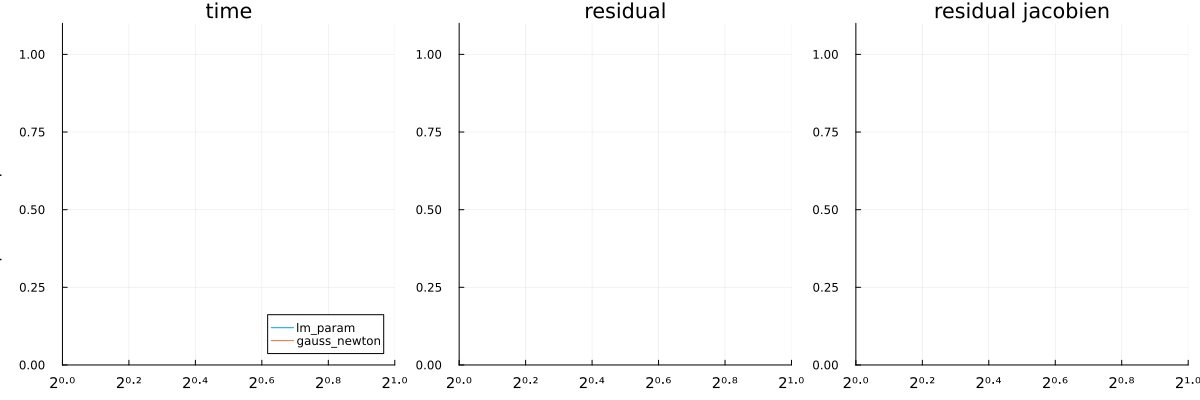

In [5]:
cols = [:id, :name, :nvar, :objective, :dual_feas, :neval_residual, :neval_jac_residual, :neval_hess, :iter, :elapsed_time, :status]
header = Dict(
  :nvar => "n",
  :objective => "f(x)",
  :dual_feas => "‖∇f(x)‖",
  :neval_residual => "# f",
  :neval_jac_residual => "# ∇f",
  :neval_hess => "# ∇²f",
  :elapsed_time => "t",
)

for solver ∈ keys(solvers)
  pretty_stats(stats[solver][!, cols], hdr_override=header)
end

first_order(df) = df.status .== :first_order
unbounded(df) = df.status .== :unbounded
solved(df) = first_order(df) .| unbounded(df)

costnames = ["time", "residual", "residual jacobien"]
costs = [
  df -> .!solved(df) .* Inf .+ df.elapsed_time,
  df -> .!solved(df) .* Inf .+ df.neval_residual,
  df -> .!solved(df) .* Inf .+ df.neval_jac_residual,
]

using Plots
gr()

profile_solvers(stats, costs, costnames)

## Exercice 3: Rocket Control

Dans les cellules ci-dessous nous introduisons un modèle de contrôle optimal (cf. https://en.wikipedia.org/wiki/Optimal_control ) pour le contrôle d'une fusée dont une version discrétisée a été modélisé avec JuMP:

Le lien vers le tutoriel:
https://nbviewer.jupyter.org/github/jump-dev/JuMPTutorials.jl/blob/master/notebook/modelling/rocket_control.ipynb

In [ ]:
using JuMP, Ipopt

# Create JuMP model, using Ipopt as the solver
rocket = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 0))

# Constants
# Note that all parameters in the model have been normalized
# to be dimensionless. See the COPS3 paper for more info.
h_0 = 1    # Initial height
v_0 = 0    # Initial velocity
m_0 = 1    # Initial mass
g_0 = 1    # Gravity at the surface

T_c = 3.5  # Used for thrust
h_c = 500  # Used for drag
v_c = 620  # Used for drag
m_c = 0.6  # Fraction of initial mass left at end

c     = 0.5 * sqrt(g_0 * h_0)  # Thrust-to-fuel mass
m_f   = m_c * m_0            # Final mass
D_c   = 0.5 * v_c * m_0 / g_0    # Drag scaling
T_max = T_c * g_0 * m_0        # Maximum thrust

n = 800   # Time steps

@variables(rocket, begin
    Δt ≥ 0, (start = 1/n) # Time step
    # State variables
    v[1:n] ≥ 0            # Velocity
    h[1:n] ≥ h_0          # Height
    m_f ≤ m[1:n] ≤ m_0    # Mass
    # Control
    0 ≤ T[1:n] ≤ T_max    # Thrust
end)

# Objective: maximize altitude at end of time of flight
@objective(rocket, Max, h[n])

# Initial conditions
@constraints(rocket, begin
    v[1] == v_0
    h[1] == h_0
    m[1] == m_0
    m[n] == m_f
end)

# Forces
# Drag(h,v) = Dc v^2 exp( -hc * (h - h0) / h0 )
@NLexpression(rocket, drag[j = 1:n], D_c * (v[j]^2) * exp(-h_c * (h[j] - h_0) / h_0))
# Grav(h)   = go * (h0 / h)^2
@NLexpression(rocket, grav[j = 1:n], g_0 * (h_0 / h[j])^2)
# Time of flight
@NLexpression(rocket, t_f, Δt * n)

# Dynamics
for j in 2:n
    # h' = v
    
    # Rectangular integration
    # @NLconstraint(rocket, h[j] == h[j - 1] + Δt * v[j - 1])
    
    # Trapezoidal integration
    @NLconstraint(rocket,
        h[j] == h[j - 1] + 0.5 * Δt * (v[j] + v[j - 1]))

    # v' = (T-D(h,v))/m - g(h)
    
    # Rectangular integration
    # @NLconstraint(rocket, v[j] == v[j - 1] + Δt *(
    #                 (T[j - 1] - drag[j - 1]) / m[j - 1] - grav[j - 1]))
    
    # Trapezoidal integration
    @NLconstraint(rocket,
        v[j] == v[j-1] + 0.5 * Δt * (
            (T[j] - drag[j] - m[j] * grav[j]) / m[j] +
            (T[j - 1] - drag[j - 1] - m[j - 1] * grav[j - 1]) / m[j - 1]))

    # m' = -T/c

    # Rectangular integration
    # @NLconstraint(rocket, m[j] == m[j - 1] - Δt * T[j - 1] / c)
    
    # Trapezoidal integration
    @NLconstraint(rocket,
        m[j] == m[j - 1] - 0.5 * Δt * (T[j] + T[j-1]) / c)
end

In [ ]:
# Solve for the control and state
println("Solving...")
status = optimize!(rocket)

# Display results
# println("Solver status: ", status)
println("Max height: ", objective_value(rocket))

In [ ]:
value.(h)[n]

In [ ]:
# Can visualize the state and control variables
using Gadfly

In [ ]:
h_plot = plot(x = (1:n) * value.(Δt), y = value.(h)[:], Geom.line,
                Guide.xlabel("Time (s)"), Guide.ylabel("Altitude"))
m_plot = plot(x = (1:n) * value.(Δt), y = value.(m)[:], Geom.line,
                Guide.xlabel("Time (s)"), Guide.ylabel("Mass"))
v_plot = plot(x = (1:n) * value.(Δt), y = value.(v)[:], Geom.line,
                Guide.xlabel("Time (s)"), Guide.ylabel("Velocity"))
T_plot = plot(x = (1:n) * value.(Δt), y = value.(T)[:], Geom.line,
                Guide.xlabel("Time (s)"), Guide.ylabel("Thrust"))
draw(SVG(6inch, 6inch), vstack(hstack(h_plot, m_plot), hstack(v_plot, T_plot)))

### Questions:     
    - i) Transformer le modèle JuMP utilisé ci-dessus en un NLPModel en utilisant le package `NLPModelsJuMP`.    
    - ii) Résoudre ce nouveau modèle avec `Ipopt` en utilisant `NLPModelsIpopt`.    
    - iii) Calcul séparément la différence entre les h,v,m,T, Δt calculés.    
    - iv) Est-ce que le contrôle T atteint ses bornes ?    
    - v) Reproduire les graphiques ci-dessous avec la solution calculée via `NLPModelsIpopt`.


In [ ]:
using NLPModels, LinearAlgebra, NLPModelsJuMP, NLPModelsIpopt